In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('archive/olist_customers_dataset.csv')
sellers = pd.read_csv('archive/olist_sellers_dataset.csv')
order_reviews = pd.read_csv('archive/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('archive/olist_order_items_dataset.csv')
products = pd.read_csv('archive/olist_products_dataset.csv')
geolocation = pd.read_csv('archive/olist_geolocation_dataset.csv')
product_category = pd.read_csv('archive/product_category_name_translation.csv')
orders = pd.read_csv('archive/olist_orders_dataset.csv')
payments = pd.read_csv('archive/olist_order_payments_dataset.csv')

In [3]:
customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [4]:
sellers.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [5]:
order_reviews.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [6]:
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [7]:
products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [8]:
geolocation.head(1)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP


In [9]:
product_category.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


In [10]:
orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [11]:
payments.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [12]:
dataset_names = ['customers', 'sellers', 'order_reviews','order_items', 'products', 'geolocation', 'product_category', 'orders', 'payments']
for i in dataset_names :
    print("The {:18s} dataset shape is {}".format(i, (eval(i).shape)))

The customers          dataset shape is (99441, 5)
The sellers            dataset shape is (3095, 4)
The order_reviews      dataset shape is (100000, 7)
The order_items        dataset shape is (112650, 7)
The products           dataset shape is (32951, 9)
The geolocation        dataset shape is (1000163, 5)
The product_category   dataset shape is (71, 2)
The orders             dataset shape is (99441, 8)
The payments           dataset shape is (103886, 5)


In [13]:
products = pd.merge(products, product_category, on='product_category_name', how='left')
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [14]:
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


In [15]:
df = pd.merge(orders, customers, on='customer_id')
df = df.merge(order_items, on='order_id')
df = df.merge(order_reviews, on='order_id')
df = df.merge(payments, on='order_id')
df = df.merge(products, on='product_id')
df = df.merge(sellers, on='seller_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [16]:
df_1=df['review_score']
df_1.head

<bound method NDFrame.head of 0         4
1         4
2         4
3         4
4         5
         ..
118310    5
118311    1
118312    5
118313    4
118314    5
Name: review_score, Length: 118315, dtype: int64>

# Exploratory Data Analysis

### 1. Where do most customers come from?

In [17]:
state_df = df.groupby('customer_state').count()['customer_id'].reset_index()
state_df = state_df.sort_values(by=['customer_id'], ascending = False)

city_df = df.groupby('customer_city').count()['customer_id'].reset_index()
city_df = city_df.sort_values(by=['customer_id'], ascending = False)

In [18]:
state_df.head(2)

,customer_state,customer_id
25,SP,49865
18,RJ,15425


In [19]:
city_df.head(2)

,customer_city,customer_id
3588,sao paulo,18728
3147,rio de janeiro,8261


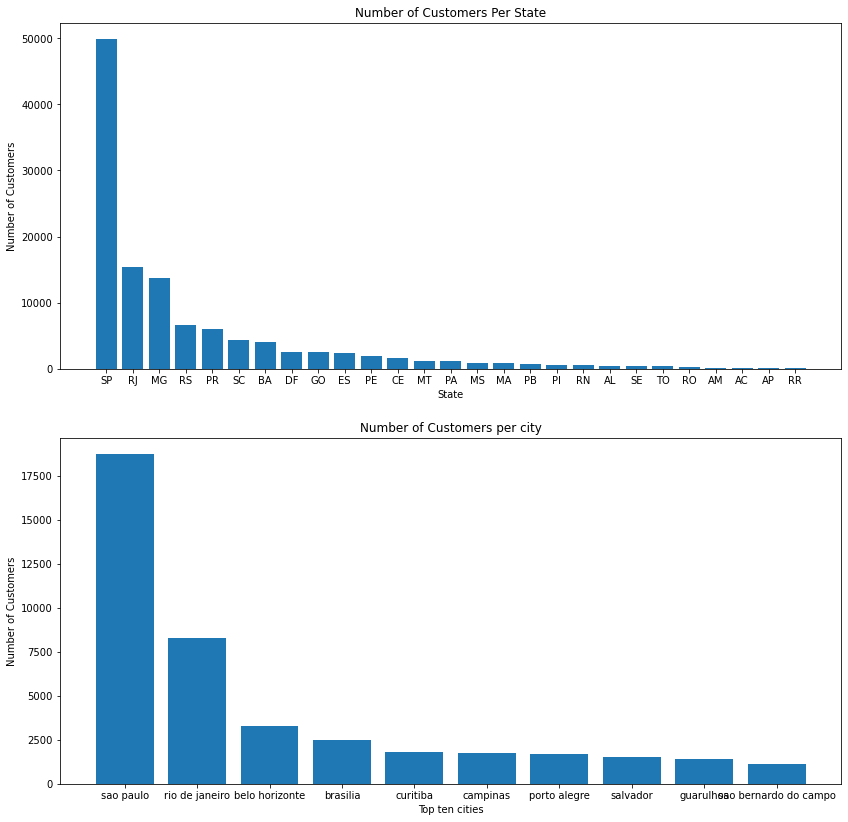

In [20]:
plt.figure(figsize=(14,14))

plt.subplot(211)
plt.bar(state_df['customer_state'], state_df['customer_id'])
plt.title('Number of Customers Per State')
plt.xlabel('State')
plt.ylabel('Number of Customers')

plt.subplot(212)
plt.bar(city_df.nlargest(10,'customer_id')['customer_city'], city_df.nlargest(10,'customer_id')['customer_id'])
#sns.barplot(data = city_df.nlargest(10,'customer_id'), x = 'customer_city', y = 'customer_id', color = base_color)
plt.title('Number of Customers per city')
plt.xlabel('Top ten cities')
plt.ylabel('Number of Customers')
plt.show()

As you can see most customers are from SP and RJ states and cities. It is not much of a surprise here, as most of brazil's population is in these two states.

### 2) What are the most frequent items bought by the customer?

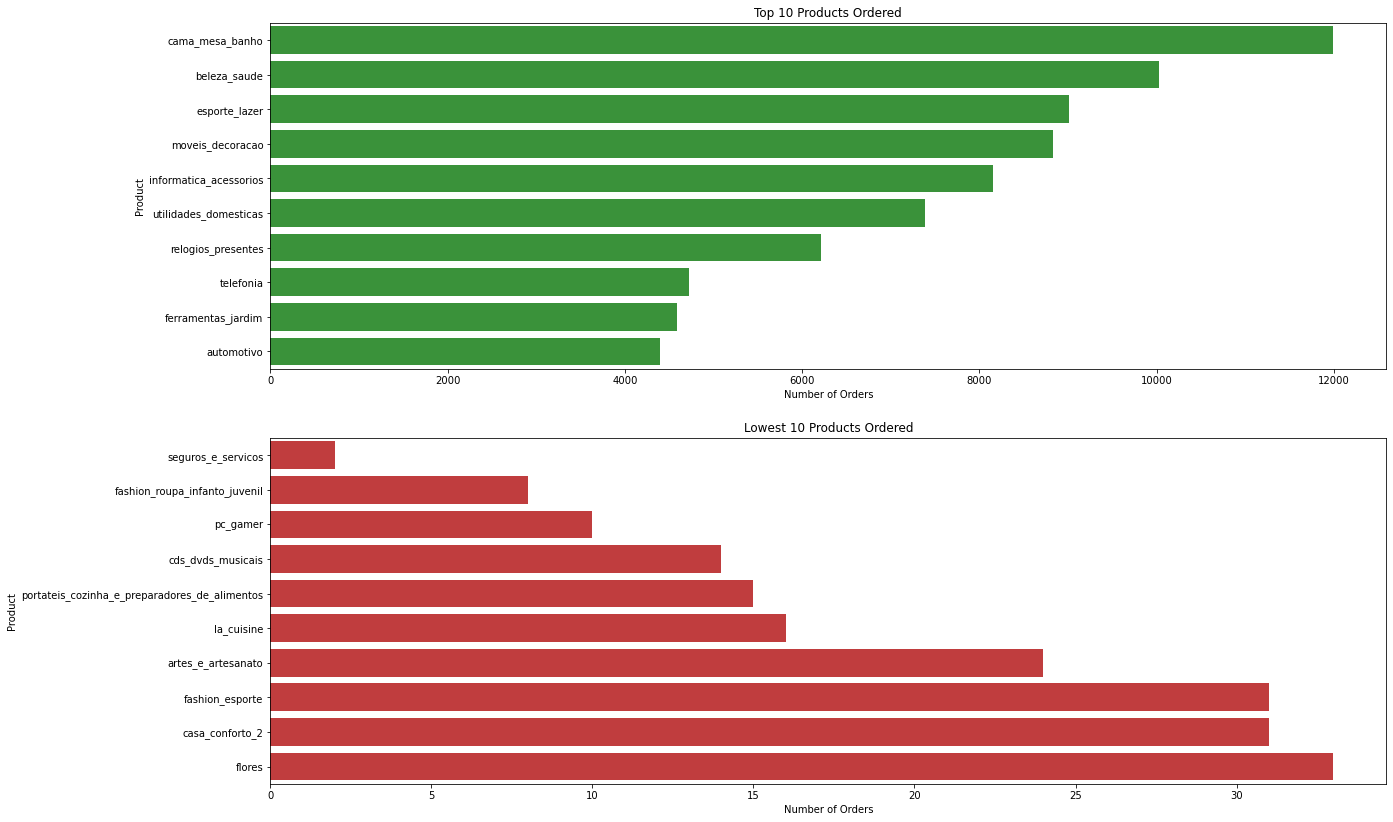

In [21]:
top_products = df['product_category_name'].value_counts().reset_index().nlargest(10,'product_category_name')
lowest_products = df['product_category_name'].value_counts().reset_index().nsmallest(10,'product_category_name')

plt.figure(figsize = (20,14))
red_color = sns.color_palette()[3]
green_color = sns.color_palette()[2]

plt.subplot(211)
sns.barplot(data = top_products, x = 'product_category_name', y = 'index', color = sns.color_palette()[2])
plt.title('Top 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

plt.subplot(212)
sns.barplot(data = lowest_products, x = 'product_category_name', y = 'index', color = sns.color_palette()[3])
plt.title('Lowest 10 Products Ordered')
plt.xlabel('Number of Orders')
plt.ylabel('Product');

As we can see Bath, table and Bed products are ordered the most and are followed by beauty, health products and sports leisure products

also, Insurance services have the lowest amount of products ordered, followed by kids clothes, and pc gaming products.

### 3) What are the most common payment types?

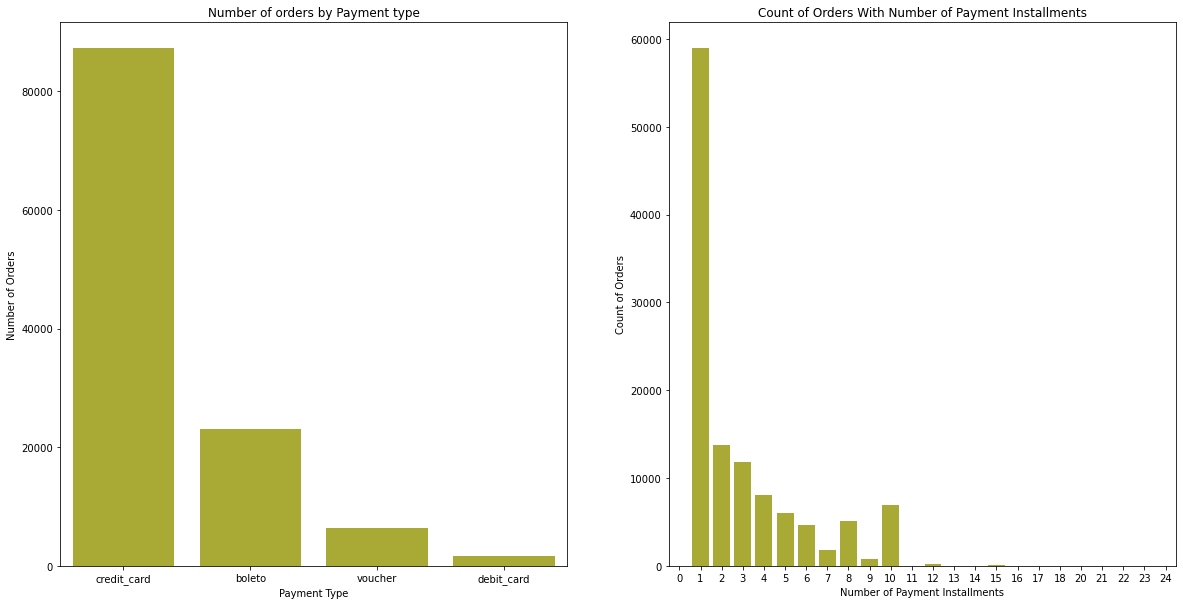

In [22]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.barplot(data = df['payment_type'].value_counts().reset_index(), x = 'index', y = 'payment_type', color = sns.color_palette()[8])
plt.title('Number of orders by Payment type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders');


plt.subplot(122)
sns.barplot(data = df['payment_installments'].value_counts().reset_index(), x = 'index', y = 'payment_installments', color = sns.color_palette()[8])
plt.title('Count of Orders With Number of Payment Installments')
plt.xlabel('Number of Payment Installments')
plt.ylabel('Count of Orders');

From the first plot, we see that most payments are done using credit cards. In fact, they are more than 3 times higher than any other payment types in the data set.

In the second plot, we see that the most common number of payment installments is 1. After that the amount of orders decreases as the number of payment installments increases. However, 8 and 10 payment installments rise a bit more.

### 3) What are the top 10 most rated products?

Text(0, 0.5, 'Review Score')

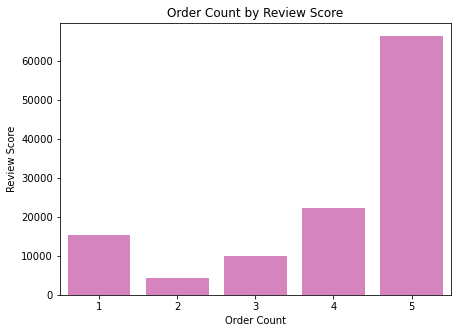

In [23]:
plt.figure(figsize = (7,5))
sns.barplot(data = df.groupby('review_score').count()['order_id'].reset_index(), x = 'review_score', y = 'order_id', color = sns.color_palette()[6] )
plt.title('Order Count by Review Score')
plt.xlabel('Order Count')
plt.ylabel('Review Score')

The highest amount of orders have 5 start reviews and as the ratings decrease so do the order counts, except for 1. A review score of 1 has more orders than 2 or 3.

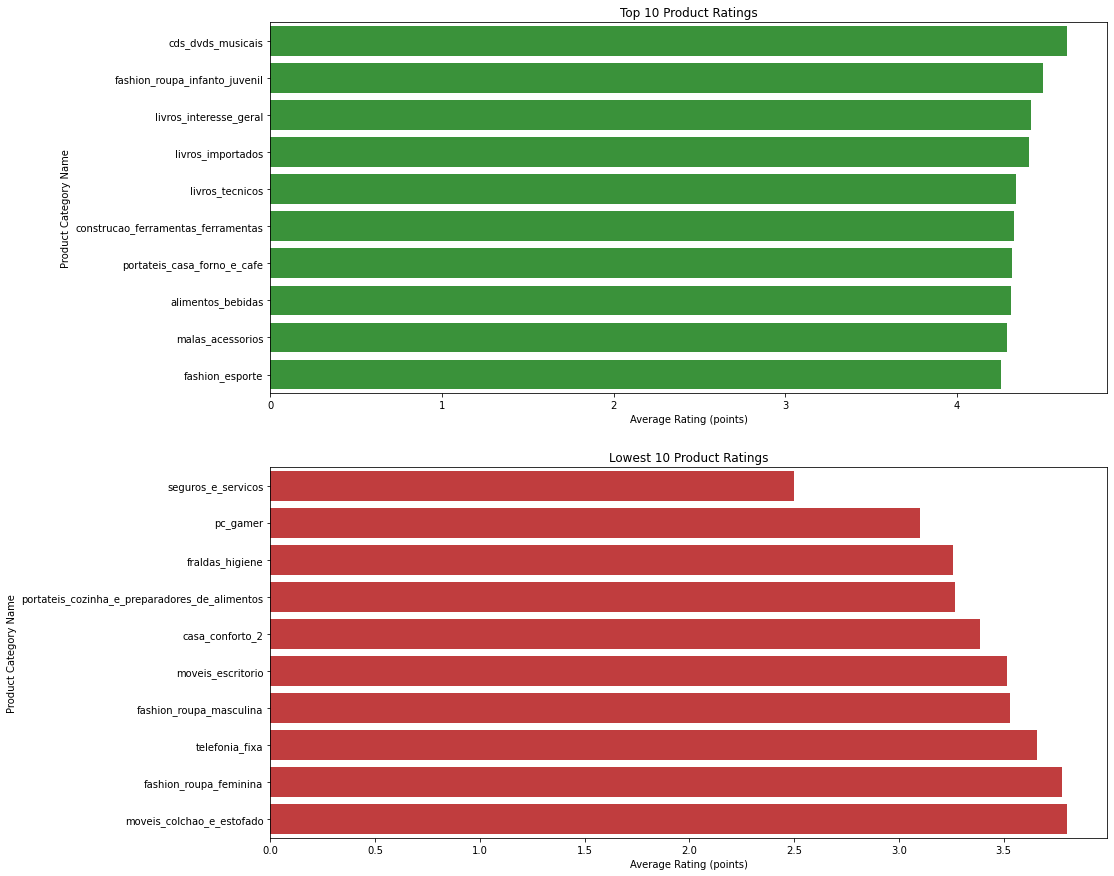

In [24]:
prd_rev_means = df.groupby('product_category_name').mean()['review_score'].reset_index()
top_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nlargest(10,'review_score')
lowest_10_ratings = prd_rev_means.sort_values('review_score', ascending = False).nsmallest(10,'review_score')

plt.figure(figsize = (15,15))

plt.subplot(211)
sns.barplot(data = top_10_ratings, x = 'review_score', y = 'product_category_name', color = green_color)
plt.title('Top 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');


plt.subplot(212)
sns.barplot(data = lowest_10_ratings, x = 'review_score', y = 'product_category_name', color = red_color)
plt.title('Lowest 10 Product Ratings')
plt.xlabel('Average Rating (points)')
plt.ylabel('Product Category Name');

In [25]:
df['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
orders = df[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders.head(3)

,order_purchase_month,order_purchase_year,order_id,period
16,9,2016,3,9/2016
19,10,2016,386,10/2016
22,12,2016,1,12/2016


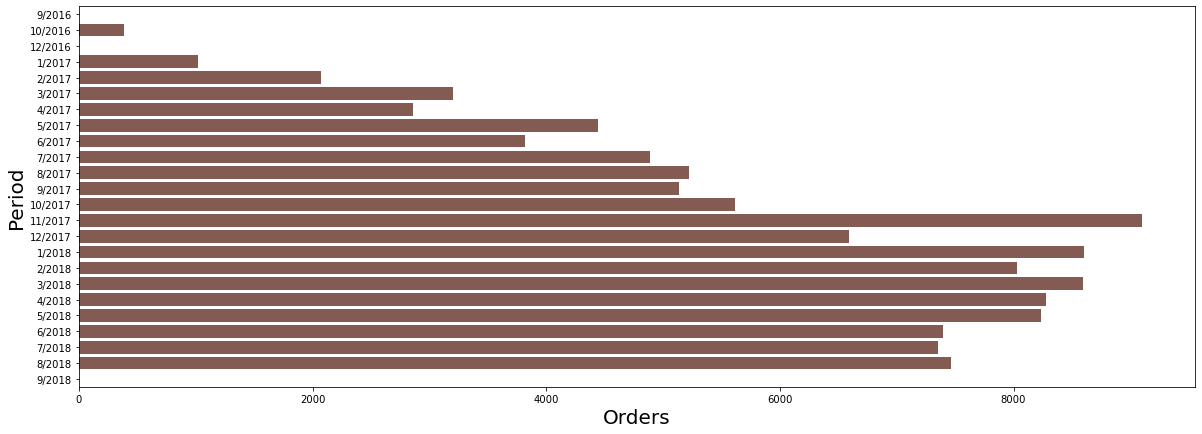

In [26]:
plt.figure(figsize=(20,7))
sns.barplot(data = orders, x = 'order_id', y = 'period', color = sns.color_palette()[5])
plt.xlabel('Orders',fontsize=20);
plt.ylabel('Period',fontsize=20);
plt.show()

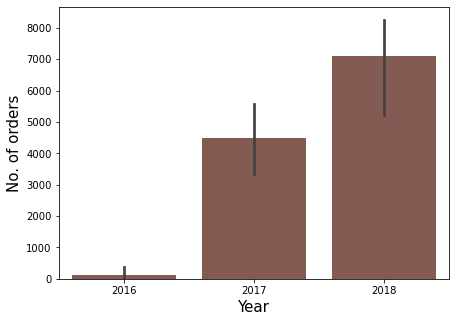

In [27]:
orders.groupby(['order_purchase_year']).sum()
plt.figure(figsize=(7,5))
sns.barplot(data = orders, x = 'order_purchase_year', y = 'order_id', color = sns.color_palette()[5])
plt.xlabel('Year',fontsize=15);
plt.ylabel('No. of orders',fontsize=15);

In [28]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14797
1,furniture_decor,12186
2,health_beauty,11486
3,sports_leisure,10349
4,computers_accessories,10273
5,housewares,9559
6,watches_gifts,6823
7,garden_tools,6152
8,telephony,5354
9,auto,5067


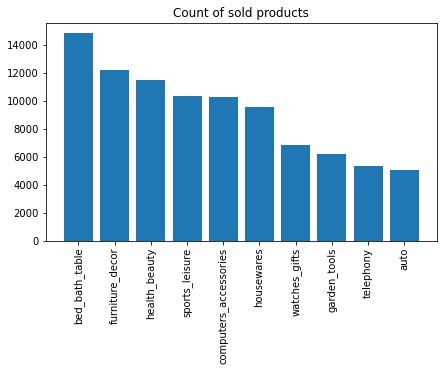

In [29]:
plt.figure(figsize=(7,4))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Count of sold products')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [30]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
review_id                             0
review_score                          0
review_comment_title             104226
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0


In [32]:
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 
           'freight_value', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 
           'order_purchase_year', 'order_purchase_month']
df = df[columns]
df.head()

,order_status,customer_state,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_year,order_purchase_month
0,delivered,SP,1,29.99,8.72,1,credit_card,1,18.12,2017,10
1,delivered,SP,1,29.99,8.72,3,voucher,1,2.00,2017,10
2,delivered,SP,1,29.99,8.72,2,voucher,1,18.59,2017,10
3,delivered,SP,1,29.99,7.78,1,credit_card,3,37.77,2017,8
4,delivered,SP,1,29.99,7.78,1,credit_card,1,37.77,2017,8


In [33]:
df.isnull().sum()

order_status            0
customer_state          0
order_item_id           0
price                   0
freight_value           0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
order_purchase_year     0
order_purchase_month    0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


num_attributes = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 
                  'payment_value', 'order_purchase_year', 'order_purchase_month']
cat_attributes = ['order_status', 'customer_state', 'payment_type']

pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_attributes),
        ('cat', OneHotEncoder(), cat_attributes),
])
df_prepared = pipeline.fit_transform(df).toarray()

In [36]:
df_prepared.shape

(118315, 46)

In [37]:
from sklearn.decomposition import PCA

# Preserving 95% of the variance
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_prepared)
df_reduced
df_reduced.shape

(118315, 12)

In [38]:
from sklearn.cluster import KMeans

k_range = range(2, 10 )
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_reduced)for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k]

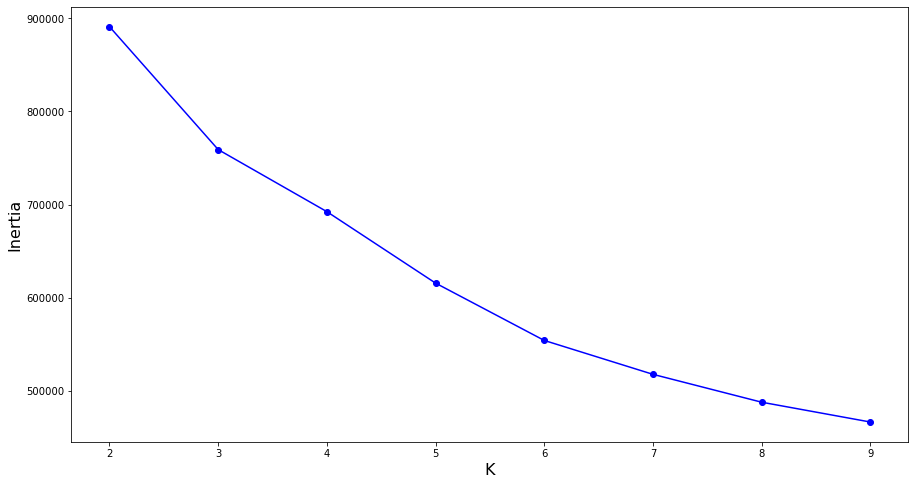

In [39]:
plt.figure(figsize=(15, 8))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('K', fontsize=16)
plt.ylabel('Inertia', fontsize=16)
plt.show()

In [43]:
from sklearn.metrics import silhouette_score
n=0
silhouette_scores=[]
for model in kmeans_per_k: 
    silhouette_scores.append(silhouette_score(df_reduced, model.labels_))
    print ('model')


model
model
model
model
model
model
model
model


In [44]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

best_k

7

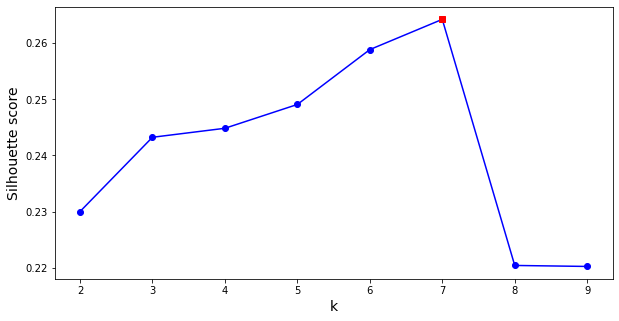

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, 'rs')
plt.show()

In [47]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=7, random_state=42)

In [48]:
y_pred = best_model.fit_predict(df_reduced)

In [49]:
import pickle
pickle.dump(best_model,open('model.pkl','wb'))

In [50]:
for i in range(best_k):
    print(f"cluster {i + 1} contains: {np.sum(y_pred == i)} customers")

cluster 1 contains: 4368 customers
cluster 2 contains: 4041 customers
cluster 3 contains: 50556 customers
cluster 4 contains: 42114 customers
cluster 5 contains: 15423 customers
cluster 6 contains: 535 customers
cluster 7 contains: 1278 customers


In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
df_reduced = tsne.fit_transform(df_prepared)

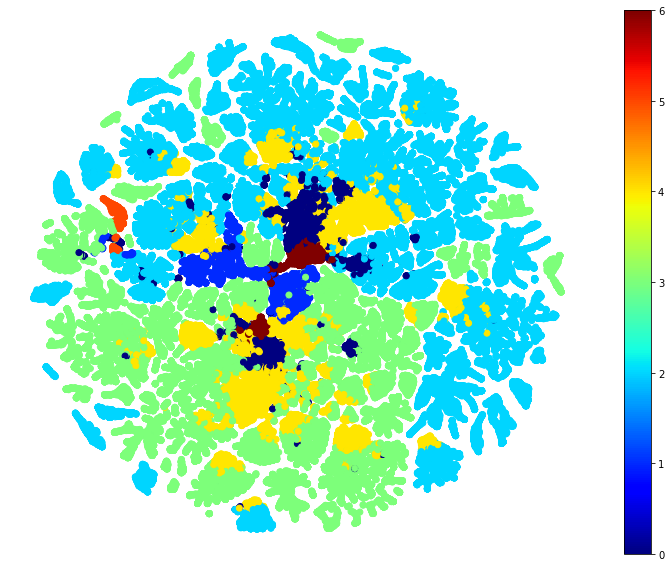

In [52]:
plt.figure(figsize=(13,10 ))
plt.scatter(df_reduced[:, 0], df_reduced[:, 1],c=y_pred, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()